# Getting started with XGI
<div>
<img src="../logo/logo.svg" width="200"/>
</div>

XGI is a Python library to make working with and analyzing complex systems with higher-order interactions easy.

We start off by loading the XGI library.

In [51]:
import xgi
import numpy as np
import pandas as pd
from IPython.display import display

## Creating a hypergraph

We want to start with a hypergraph, and this can be done in one of four ways:
1. Build a hypergraph node-by-node and edge-by-edge (less common, but can be helpful in writing your own generative models)
2. Load an existing dataset
3. Sample from a random generative model

Let's start with the first method.

In [4]:
H = xgi.Hypergraph()
H.add_edge([1, 2], id="a")
H.add_node(0)
H.add_edges_from([[3, 4], [0, 2, 3]])
H.add_nodes_from([9, 10])

XGI automatically assigns unique edge IDs (if a user doesn't specify the ID)

In [5]:
H.edges

EdgeView(('a', 0, 1))

EdgeViews, NodeViews, and all other view classes are implemented so that users can access many different types of data. For example:

In [6]:
print(H.nodes.memberships())
print(H.nodes.degree.asdict())
print(H.edges.members(dtype=list))
print(H.edges.size.asnumpy())

{1: ['a'], 2: ['a', 1], 0: [1], 3: [0, 1], 4: [0], 9: [], 10: []}
{1: 1, 2: 2, 0: 1, 3: 2, 4: 1, 9: 0, 10: 0}
[[1, 2], [3, 4], [0, 2, 3]]
[2 2 3]


Moving on to method 2, one can load datasets in several different ways. First, we provide a companion data repository, [xgi-data](https://github.com/ComplexGroupInteractions/xgi-data), where users can easily load several datasets in standard format:

In [7]:
H = xgi.load_xgi_data("email-enron")

This dataset, for example, has a corresponding [datasheet](https://github.com/ComplexGroupInteractions/xgi-data/blob/main/data/email-Enron/README_email-Enron.md) explaining its characteristics. The nodes (individuals) in this dataset contain associated email addresses and the edges (emails) contain associated timestamps. These attributes can be accessed by simply typing `H.nodes[id]` or `H.edges[id]` respectively.

In [21]:
print("The first 10 node IDs are:")
print(list(H.nodes)[:10])
print("\nThe first 10 edge IDs are:")
print(list(H.edges)[:10])
print("\nThe attributes of node '4' are")
print(H.nodes["4"])
print("\nThe attributes of edge '6' are")
print(H.edges["6"])

The first 10 node IDs are:
['4', '1', '117', '129', '51', '41', '65', '107', '122', '29']

The first 10 edge IDs are:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

The attributes of node '4' are
{'name': 'robert.badeer@enron.com'}

The attributes of edge '6' are
{'timestamp': '2000-02-22T08:07:00'}


Likewise, one can load from a file. For example, in the `data` folder, there is a disease-gene hypergraph in bipartite edgelist format, where nodes are diseases and edges are genes. We can read in this dataset:

In [23]:
H = xgi.read_bipartite_edgelist("../data/disGene.txt")

We can find out basic statistics of this dataset like number of nodes and edges.

In [32]:
print(f"The hypergraph has {H.num_nodes} nodes and {H.num_edges} edges")

The hypergraph has 12368 nodes and 2261 edges


We may also be interested in the hypergraph formed by considering nodes to be genes and edges to be diseases. This is known as the *dual* of the original hypergraph:

In [33]:
D = H.dual()
print(f"The hypergraph has {D.num_nodes} nodes and {D.num_edges} edges")

The hypergraph has 2261 nodes and 12368 edges


Lastly, we can create  synthetic hypergraphs using random generative models. For example, we can extract the degree and edge size sequence and wire them together at random (according to the Chung-Lu model) to create a random null model:

In [34]:
k = H.nodes.degree.asdict()
s = H.edges.size.asdict()

H_random = xgi.chung_lu_hypergraph(k, s)

## Basic functionality

In this section, we describe how to get
* connectivity and assortativity of a hypergraph
* statistics of the nodes and edges
* matrices associated to the hypergraph

Consider the random hypergraph we just created. Let's check whether it's connected and if not, the sizes of the connected components:

In [52]:
connected = xgi.is_connected(H_random)
if not connected:
    size, num = np.unique([len(cc) for cc in xgi.connected_components(H_random)], return_counts=True)
    print(f"The connected components:")
    display(pd.DataFrame([size, num], columns=["size", "number"]))

The connected components


,size,number
0,1,10905
1,1463,1


Likewise, we can also look at the assortativity. Using two of the definitions of assortativity in "Configuration models of random hypergraphs" by Phil Chodrow, we compute

In [60]:
print(f"The uniform assortativity of the hypergraph is {xgi.degree_assortativity(H_random, kind='uniform')}")
print(f"The top-2 assortativity of the hypergraph is {xgi.degree_assortativity(H_random, kind='top-2')}")
print(f"The top-bottom assortativity of the hypergraph is {xgi.degree_assortativity(H_random, kind='top-bottom')}")

The uniform assortativity of the hypergraph is -0.013933394525031818
The top-2 assortativity of the hypergraph is 0.704093964828371
The top-bottom assortativity of the hypergraph is -0.6208525361267561


### The power of NodeStats and EdgeStats

XGI has a powerful interface for manipulating statistics associated with nodes (degrees, centralities, community labels, etc.) and edges (edge size, etc.). One can return different datatypes, compute basic statistics, and much more:

The min degree is 1, the max degree is 382, and the mean degree is 9.183457309184993


<AxesSubplot:>

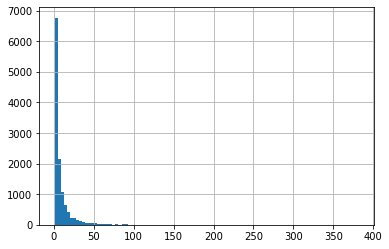

In [68]:
print(f"The min degree is {H.nodes.degree.min()}, the max degree is {H.nodes.degree.max()}, and the mean degree is {H.nodes.degree.mean()}")
H.nodes.degree.aspandas().hist(bins=100)

Likewise, for edges,

The min edge size is 1, the max edge size is 2453, and the mean edge size is 50.234851835471034


<AxesSubplot:>

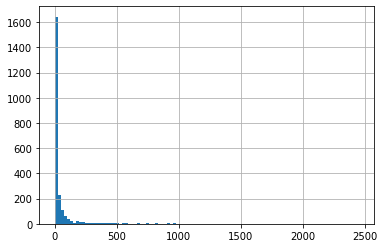

In [70]:
print(f"The min edge size is {H.edges.size.min()}, the max edge size is {H.edges.size.max()}, and the mean edge size is {H.edges.size.mean()}")
H.edges.size.aspandas().hist(bins=100)

## Visualization

This is a quick demonstration to show how to visualize a hypergraph.

In [82]:
# xgi.draw(H_random)